<a href="https://colab.research.google.com/github/SurabhiSharma-hub/Suru-puddle/blob/main/Housing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading dataset

In [ ]:
import pandas as pd

# Load the dataset
data = '/content/Housing.csv'
df = pd.read_csv(data)

# Display the first few rows of the dataframe
df.head(5)
#df.info()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

First few rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2    

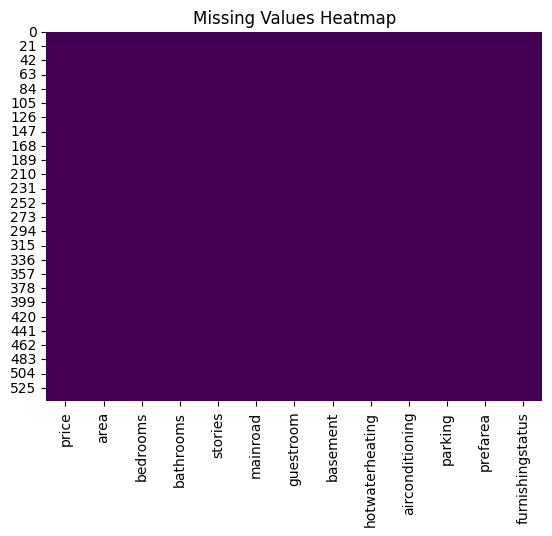


Duplicate Rows:
0

Unique values in mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Unique values in guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Unique values in basement:
basement
no     354
yes    191
Name: count, dtype: int64

Unique values in hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Unique values in airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Unique values in prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Unique values in furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


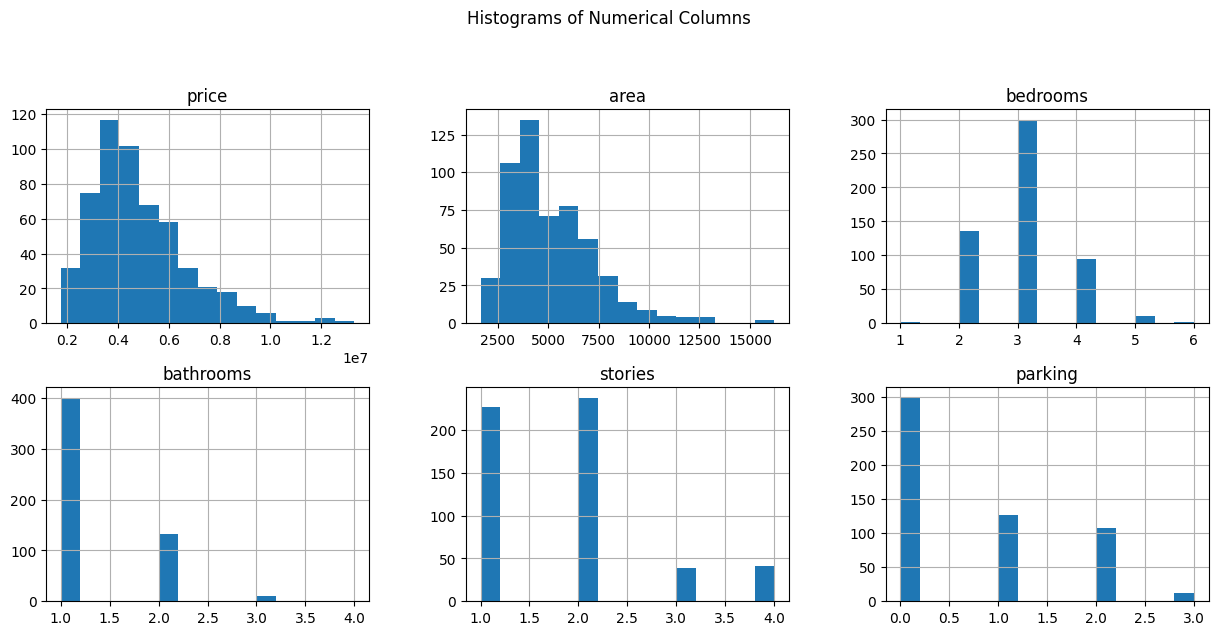

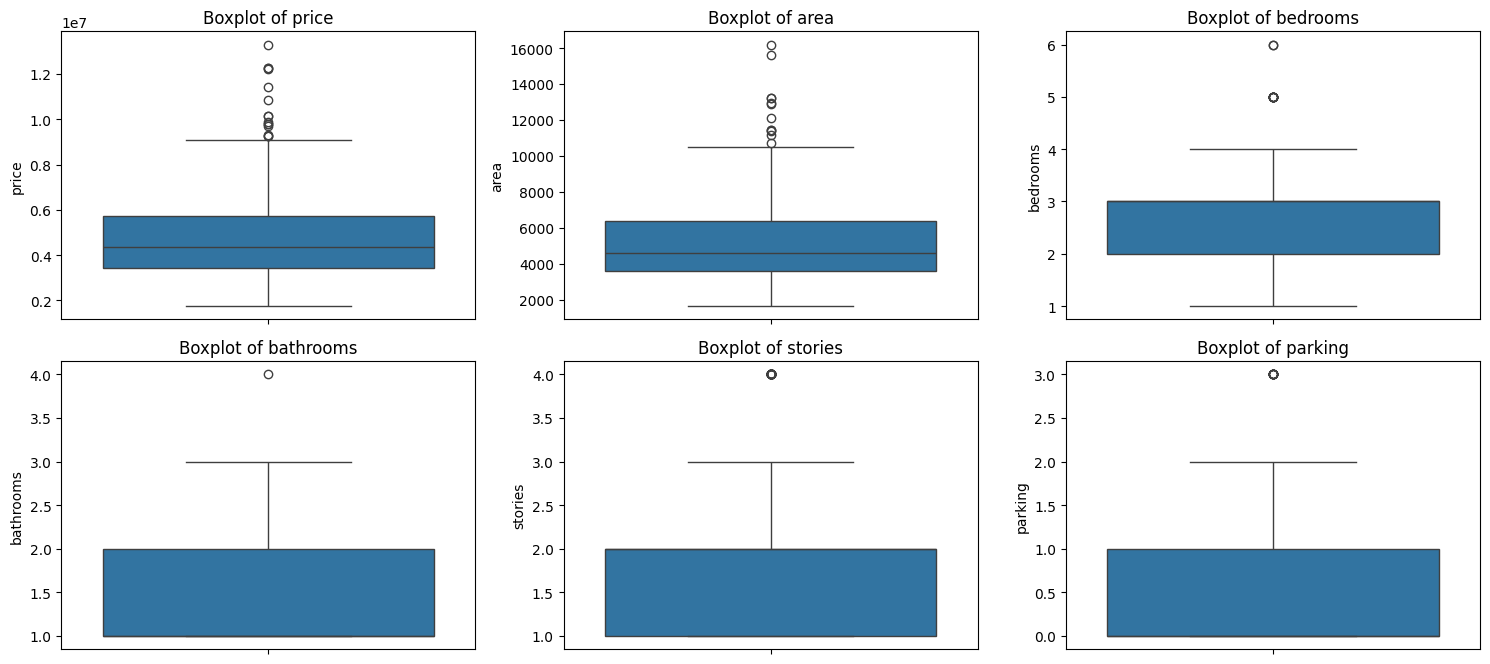

In [ ]:
# check missing values in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("/content/Housing.csv")

#1. Inspect the data
print("Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# 2. Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 3. Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 4. Duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# 5. Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# 6. Data visualization
# Histograms for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(len(numerical_columns) // 3 + 1, 3))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Boxplots for numerical columns to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(df_encoded[numerical_cols])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Concatenate scaled numerical columns and one-hot encoded categorical columns
df_final = pd.concat([df_encoded.drop(columns=numerical_cols), scaled_df], axis=1)

# Display the first few rows of the final dataframe
df_final.head()
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Housing.csv")
dummy_df = pd.get_dummies(df)
dummy_df=pd.get_dummies(df,drop_first=True)
df
dummy_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/Housing.csv")

# Convert boolean columns to integers
#bool_cols = df.select_dtypes(include=['float64']).columns
#df[bool_cols] = df[bool_cols].astype(int)

# One-Hot Encode categorical variables and drop the first level to avoid dummy variable trap
dummy_df = pd.get_dummies(df, drop_first=True)

# Identify numerical columns again after one-hot encoding
numerical_cols = dummy_df.select_dtypes(include=['bool', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(dummy_df[numerical_cols])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Concatenate scaled numerical columns and one-hot encoded categorical columns
final_df = pd.concat([dummy_df.drop(columns=numerical_cols), scaled_df], axis=1)

# Display the final dataframe
final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_yes                     545 non-null    float64
 7   guestroom_yes                    545 non-null    float64
 8   basement_yes                     545 non-null    float64
 9   hotwaterheating_yes              545 non-null    float64
 10  airconditioning_yes              545 non-null    float64
 11  prefarea_yes                     545 non-null    float64
 12  furnishingstatus_semi-

shape of X=  (545, 13)
shape of y=  (545,)
shape of X_train=  (436, 13)
shape of y_train=  (436,)
shape of X_test=  (109, 13)
shape of y_test=  (109,)
Mean Squared Error LR: 0.5023642289784899
R-squared LR: 0.6529242642153175


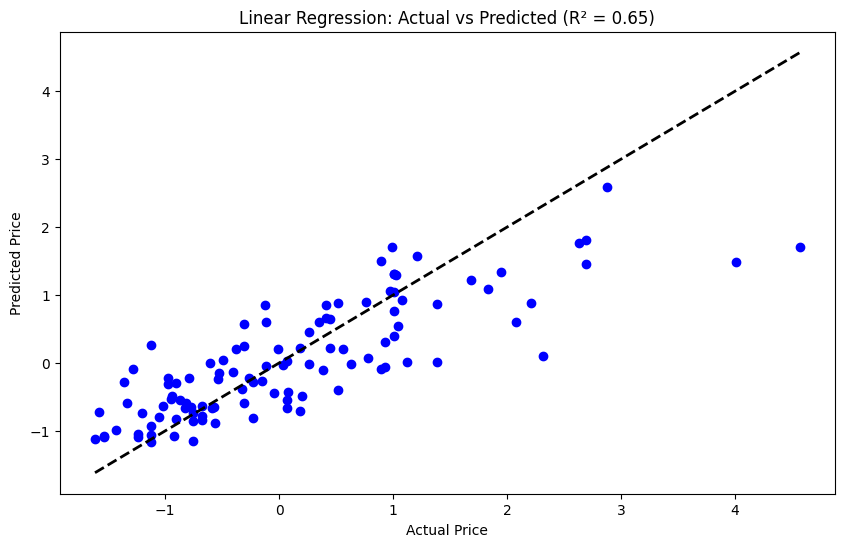

Mean Squared Error SVR: 0.5751266287536815
R-squared SVR: 0.6026538389288962


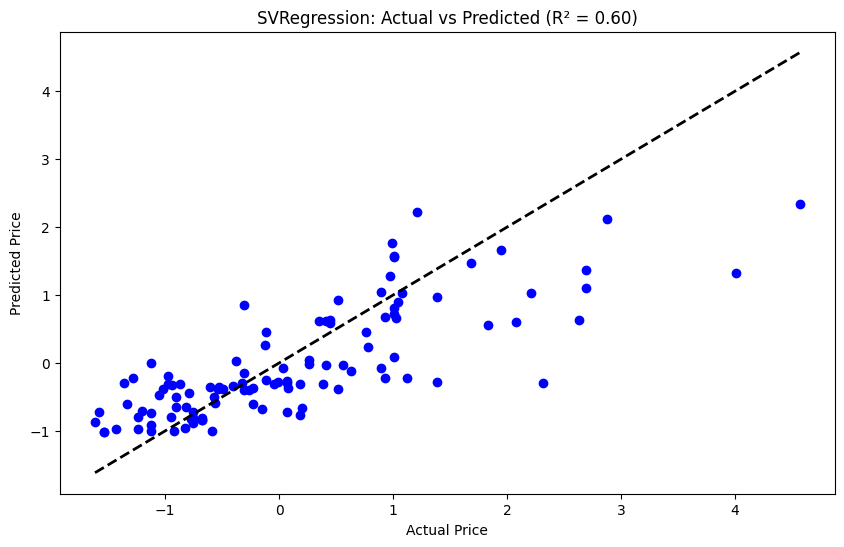

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt



# Assuming 'Price' is the target variable
X = final_df.drop(columns=['price'])
y = final_df['price']
print('shape of X= ',X.shape)
print('shape of y= ',y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train= ",X_train.shape)
print("shape of y_train= ",y_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_test= ",y_test.shape)

'''sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)'''



# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error LR:", mse)
print("R-squared LR:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f"Linear Regression: Actual vs Predicted (R² = {r2:.2f})")

plt.show()


# Initialize and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error SVR:", mse)
print("R-squared SVR:", r2)

X_train.head()
#X_train.describe()

'''# Plot R² and MSE
plt.figure(figsize=(14, 6))

# Plot R²
plt.subplot(1, 2, 1)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.plot(X_test.iloc[:, 0], y_pred, color='black', linewidth=2, label='Regression Line')
plt.xlabel('final_df.drop(columns=["price"])')
plt.ylabel('Price')
plt.title(f"R²: {r2:.2f}")
plt.legend()
plt.show()
plt.legend()
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"R²: {r2:.2f}")'''

'''# Plot MSE
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title(f"RMSE: {mse:.2f}")'''

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f"SVRegression: Actual vs Predicted (R² = {r2:.2f})")

plt.show()

#plt.tight_layout()
#plt.show()






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=dataset.drop('price',axis=1)
y=dataset['price']

print('shape of X= ',X.shape)
print('shape of y= ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=51)

print('shape of X_train= ',X_train.shape)
print('shape of y_train= ',y_train.shape)
print('shape of X_test= ',X_test.shape)
print('shape of y_test= ',y_test.shape)

#Random forest Regression

rg =RandomForestRegressor(n_estimators=500,criterion='squared_error')
rg.fit(X_train,y_train)
rg.score(X_test, y_test)
print('R^2 is ' + str(rg.score(X_test, y_test)) + ' for Random Forest Regression')

#Predict house price

c=X_test.iloc[-1,:]
rg.predict([c])
y_test.iloc[-1]
y_pred=rg.predict(X_test)
y_pred

shape of X=  (545, 13)
shape of y=  (545,)
shape of X_train=  (436, 13)
shape of y_train=  (436,)
shape of X_test=  (109, 13)
shape of y_test=  (109,)
R^2 is 0.6933013702494935 for Random Forest Regression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4330382.        , 5912109.        , 4342198.        ,
       3683624.        , 7319438.        , 4253004.        ,
       5951680.        , 4722816.        , 4172798.        ,
       3920070.        , 3452183.        , 4451300.        ,
       3253755.51666667, 7022803.76      , 5884004.        ,
       3372985.7       , 3125044.3       , 5055848.        ,
       3633658.        , 4532570.        , 3294144.        ,
       5782042.        , 3539759.3       , 4426813.3       ,
       2811914.        , 3976532.        , 6756708.        ,
       7473426.52      , 3108280.        , 3798116.        ,
       4912047.        , 2981090.        , 5706372.        ,
       3986087.        , 3331311.66666667, 4496359.        ,
       4748821.        , 6940087.        , 7369166.        ,
       4042318.        , 3359272.        , 3960110.        ,
       5686632.        , 4049199.        , 4924679.66666667,
       3462760.        , 3849069.        , 4616052.        ,
       5938191.        ,

In [ ]:
#Random forest Regression

rg =RandomForestRegressor(n_estimators=100,criterion='squared_error')
rg.fit(X_train,y_train)
rg.score(X_test, y_test)
print('R^2 is ' + str(rg.score(X_test, y_test)) + ' for Random Forest Regression')

R^2 is 0.6882918459874557 for Random Forest Regression


In [ ]:
X_test.iloc[-1,:]
#rg.predict([X_test.iloc[-1,:]])
#y_test.iloc[-1]
#y_pred=rg.predict(X_test)
#y_pred

area                               2953.0
bedrooms                              3.0
bathrooms                             1.0
stories                               2.0
parking                               0.0
mainroad_yes                          1.0
guestroom_yes                         0.0
basement_yes                          1.0
hotwaterheating_yes                   0.0
airconditioning_yes                   1.0
prefarea_yes                          0.0
furnishingstatus_semi-furnished       0.0
furnishingstatus_unfurnished          1.0
Name: 291, dtype: float64

In [ ]:
rg.predict([X_test.iloc[-1,:]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4325895.])

In [ ]:
y_test.iloc[-1]

4200000

In [ ]:
y_pred=rg.predict(X_test)
y_pred

array([4221455.        , 5840660.        , 4337550.        ,
       3693130.        , 7327180.        , 4240565.        ,
       5928335.        , 4717230.        , 4174730.        ,
       3872890.        , 3476200.        , 4472020.        ,
       3278059.16666667, 7005180.        , 5982795.        ,
       3323631.5       , 2997750.        , 5094460.        ,
       3698905.        , 4435340.        , 3379320.        ,
       5576900.        , 3567830.        , 4415495.        ,
       2957430.        , 3981810.        , 6653570.        ,
       7523005.        , 3154900.        , 4031790.        ,
       4869550.        , 3007410.        , 5578440.        ,
       4009285.        , 3394912.5       , 4421235.        ,
       4748450.        , 6837320.        , 7457450.        ,
       3949470.        , 3318840.        , 3939110.        ,
       5347650.        , 4066825.        , 5022080.        ,
       3356360.        , 3678815.        , 4674670.        ,
       5830790.        ,

In [ ]:
y_test

353    3780000
72     6720000
307    4165000
438    3255000
79     6650000
        ...   
458    3115000
442    3220000
345    3850000
137    5740000
291    4200000
Name: price, Length: 109, dtype: int64

In [ ]:
#LOADING DATA AND DROPPING NO COLUMNS
import pandas as pd

df=pd.read_csv('/content/Housing.csv')
df.head()

dummy_df=pd.get_dummies(df)
#dummy_df=pd.get_dummies(df,drop_first=True)
dummy_df



,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [ ]:
#ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder(sparse=False, drop='first')
oh_enc_arr=oh_enc.fit_transform(df[['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning'	,'prefarea',	'furnishingstatus']])
oh_enc_arr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#CONVERTING ARRAY INTO DATAFRAME

dummy_df.keys()
oh_enc_df=pd.DataFrame(oh_enc_arr,columns=['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'])

oh_enc_df



,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#DROPPING CATEGORICAL COLUMNS AND CONCATENATING IT WITH ONE HOT ENCODED DATA
import pandas as pd


#df = pd.read_csv("/content/Housing.csv")
#df.head()

dummy_df=pd.get_dummies(df)
dummy_df=pd.get_dummies(df,drop_first=True)
dummy_df

columns_to_drop = [
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes',
    'prefarea_yes', 'furnishingstatus_semi-furnished',
    'furnishingstatus_unfurnished'
]
dummy_df.drop(columns=columns_to_drop, inplace=True)

print(dummy_df.head())

dataset=pd.concat([dummy_df,oh_enc_df],axis=1)
dataset.head()


      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Assuming 'Price' is the target variable
X = dataset.drop(columns=['price'])
y = dataset['price']
print('shape of X= ',X.shape)
print('shape of y= ',y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train= ",X_train.shape)
print("shape of y_train= ",y_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_test= ",y_test.shape)

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)



#Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_model.coef_
lr_model.intercept_





'''# Initialize and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error SVR:", mse)
print("R-squared SVR:", r2)

X_train.head()
#X_train.describe()'''

'''# Plot R² and MSE
plt.figure(figsize=(14, 6))

# Plot R²
plt.subplot(1, 2, 1)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.plot(X_test.iloc[:, 0], y_pred, color='black', linewidth=2, label='Regression Line')
plt.xlabel('final_df.drop(columns=["price"])')
plt.ylabel('Price')
plt.title(f"R²: {r2:.2f}")
plt.legend()
plt.show()
plt.legend()
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"R²: {r2:.2f}")

# Plot MSE
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title(f"RMSE: {mse:.2f}")

# Plot actual vs predicted
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f"SVRegression: Actual vs Predicted (R² = {r2:.2f})")

plt.show()

#plt.tight_layout()
#plt.show()'''






shape of X=  (545, 13)
shape of y=  (545,)
shape of X_train=  (436, 13)
shape of y_train=  (436,)
shape of X_test=  (109, 13)
shape of y_test=  (109,)


'# Plot R² and MSE\nplt.figure(figsize=(14, 6))\n\n# Plot R²\nplt.subplot(1, 2, 1)\nplt.scatter(X_test.iloc[:, 0], y_test, color=\'blue\', label=\'Actual\')\nplt.scatter(X_test.iloc[:, 0], y_pred, color=\'red\', label=\'Predicted\')\nplt.plot(X_test.iloc[:, 0], y_pred, color=\'black\', linewidth=2, label=\'Regression Line\')\nplt.xlabel(\'final_df.drop(columns=["price"])\')\nplt.ylabel(\'Price\')\nplt.title(f"R²: {r2:.2f}")\nplt.legend()\nplt.show()\nplt.legend()\nsns.scatterplot(x=y_test, y=y_pred)\nplt.xlabel("Actual Price")\nplt.ylabel("Predicted Price")\nplt.title(f"R²: {r2:.2f}")\n\n# Plot MSE\nerrors = y_test - y_pred\nsns.histplot(errors, kde=True)\nplt.xlabel("Prediction Error")\nplt.ylabel("Frequency")\nplt.title(f"RMSE: {mse:.2f}")\n\n# Plot actual vs predicted\nplt.show()\nplt.figure(figsize=(10, 6))\nplt.scatter(y_test, y_pred, color=\'blue\')\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], \'k--\', lw=2)\nplt.xlabel(\'Actual Price\')\nplt.ylabel(\'Pre

In [ ]:
#Predict value of house

X_test[0,:]

c=lr_model.predict([X_test[0,:]])
print(c)
y_test[0]
print(y_test[0])



[5164653.90033967]
13300000


In [ ]:
lr_model.predict(X_test)

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725956, 3532275.09556558,
       5611774.56836474, 6368145.98732718, 2722856.95689986,
       2629405.61585783, 9617039.50315578, 2798087.30447888,
       3171096.76847064, 3394639.09125529, 3681088.65424276,
       5263187.74621486, 3035963.47612386, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.2139565 ,
       5886993.57919883, 2730836.19518459, 4727316.47323636,
       5244847.52716799, 7555324.21605601, 3220790.84680269,
       5191898.79934207, 8143726.91009782, 3398814.09825036,
       6490693.05027925, 3315105.90747811, 6708457.36761325,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613262, 3191242.95701508,
       4596554.93225239, 4566042.8604841 , 3517779.52374149,
       7205844.79365835, 3983597.27861103, 3749338.70271055,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397125,

In [ ]:
lr_model.score(X_test, y_test)
print('R^2 =', lr_model.score(X_test, y_test))
print(y_test)


R^2 = 0.6529242642153177
316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64


In [ ]:
import pandas as pd

X=dataset.drop('price',axis=1)
y=dataset['price']


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#LOGISTIC REGRESSION
X = dataset.drop(columns=['price'])
y = dataset['price']
print('shape of X= ',X.shape)
print('shape of y= ',y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train= ",X_train.shape)
print("shape of y_train= ",y_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_test= ",y_test.shape)

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)


# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)
#class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Confusion Matrix:\n", conf_matrix)
#print("Classification Report:\n", class_report)





shape of X=  (545, 13)
shape of y=  (545,)
shape of X_train=  (436, 13)
shape of y_train=  (436,)
shape of X_test=  (109, 13)
shape of y_test=  (109,)
Accuracy: 0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/Housing.csv")

# Assuming 'Price' is the target variable
X = df.drop('price', axis=1)
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize parameters for CARS
num_iterations = 50
initial_weights = np.ones(X.shape[1]) / X.shape[1]  # Start with equal weights for all features
best_features = []
best_score = float('inf')

# CARS loop
for iteration in range(num_iterations):
    # Sample features based on weights
    selected_features = np.random.choice(X.shape[1], size=int(0.8 * X.shape[1]), replace=False, p=initial_weights)

    # Create subset of features
    X_subset = X_scaled[:, selected_features]

    # Evaluate subset using cross-validation
    model = LinearRegression()
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()

    # Update the best score and features if current subset is better
    if mean_score < best_score:
        best_score = mean_score
        best_features = selected_features

    # Reweighting: Adjust weights based on performance
    feature_importance = np.zeros(X.shape[1])
    feature_importance[selected_features] = 1 / len(selected_features)  # Simple importance measure for illustration
    initial_weights = 0.8 * initial_weights + 0.2 * feature_importance  # Update weights
    initial_weights /= initial_weights.sum()  # Normalize to sum to 1

# Final selected features
final_features = X.columns[best_features]
print("Selected features:", final_features)

# Fit model with selected features
X_selected = X_scaled[:, best_features]
final_model = LinearRegression()
final_model.fit(X_selected, y)

# Model performance
final_scores = cross_val_score(final_model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
print("Final model performance (MSE):", -final_scores.mean())


ValueError: could not convert string to float: 'yes'